# Q-Learning with Tensorflow

https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0

In [51]:
import gym
from gym import wrappers
import numpy as np
import random
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt

In [42]:
env = gym.make('FrozenLake-v0')
env = wrappers.Monitor(env, 'gym-recordings/q-learning-nn/frozenlake', force=True)

[2017-09-11 09:21:36,527] Making new env: FrozenLake-v0
[2017-09-11 09:21:36,533] Clearing 46 monitor files from previous run (because force=True was provided)


In [43]:
env.unwrapped.timestep_limit = 100

In [44]:
tf.reset_default_graph()

In [45]:
learning_rate = 0.1

inputs1 = tf.placeholder(shape=[1, env.observation_space.n], dtype=tf.float32)
W = tf.Variable(tf.random_uniform([env.observation_space.n, env.action_space.n], 0, 0.01))
Qout = tf.matmul(inputs1, W)
predict = tf.argmax(Qout, 1)

nextQ = tf.placeholder(shape=[1, env.action_space.n], dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
updateModel = trainer.minimize(loss)

## Train network

In [46]:
init = tf.global_variables_initializer()

y = 0.99
e = 0.1
num_episodes = 2000

jList = []
rList = []
with tf.Session() as session:
    session.run(init)
    
    for i in range(num_episodes):
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        
        while j < 100:
            j += 1
            # Choose an action by greedily from the Q-network
            a, allQ = session.run([predict, Qout], feed_dict={inputs1:np.identity(16)[s:s+1]})
            
            if np.random.rand(1) < e:
                # explorations
                a[0] = env.action_space.sample()
            
            # Get new state and reward 
            s1, r, d, _ = env.step(a[0])

            # Obtain Q' throught feeding the new state through the network
            Q1 = session.run(Qout, feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            
            # Obtain maxQ' and set our target value for chosen action
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0, a[0]] = r + y * maxQ1
            
            # Train our network using target and predicted Q values
            _, W1 = session.run([updateModel, W], feed_dict={inputs1:np.identity(16)[s:s+1], nextQ:targetQ})
            rAll += r
            s = s1
            
            if d == True:
                # Reduce change of random action as we train the model
                e = 1. / ((i/50.) + 10.)
                break
            
        jList.append(j)
        rList.append(rAll)

print('Percentage of successful episodes: ', float(sum(rList)) / num_episodes)

[2017-09-11 09:21:41,185] Starting new video recorder writing to /home/gartner/dev/learn-drl/gym-recordings/q-learning-nn/frozenlake/openaigym.video.3.15866.video000000.json
[2017-09-11 09:21:41,194] Starting new video recorder writing to /home/gartner/dev/learn-drl/gym-recordings/q-learning-nn/frozenlake/openaigym.video.3.15866.video000001.json
[2017-09-11 09:21:41,298] Starting new video recorder writing to /home/gartner/dev/learn-drl/gym-recordings/q-learning-nn/frozenlake/openaigym.video.3.15866.video000008.json
[2017-09-11 09:21:41,409] Starting new video recorder writing to /home/gartner/dev/learn-drl/gym-recordings/q-learning-nn/frozenlake/openaigym.video.3.15866.video000027.json
[2017-09-11 09:21:41,663] Starting new video recorder writing to /home/gartner/dev/learn-drl/gym-recordings/q-learning-nn/frozenlake/openaigym.video.3.15866.video000064.json
[2017-09-11 09:21:42,110] Starting new video recorder writing to /home/gartner/dev/learn-drl/gym-recordings/q-learning-nn/frozenla

Percentage of successful episodes:  0.4525


In [48]:
env.close()
#gym.upload('gym-recordings/q-learning-nn/frozenlake', api_key='')

[2017-09-11 09:23:52,724] [FrozenLake-v0] Uploading 2000 episodes of training data
[2017-09-11 09:23:54,945] [FrozenLake-v0] Uploading videos of 11 training episodes (1407 bytes)
[2017-09-11 09:23:55,396] [FrozenLake-v0] Creating evaluation object from gym-recordings/q-learning-nn/frozenlake with learning curve and training video
[2017-09-11 09:23:55,775] 
****************************************************
You successfully uploaded your evaluation on FrozenLake-v0 to
OpenAI Gym! You can find it at:

    https://gym.openai.com/evaluations/eval_Tdyc7b8RGaWB6A78EAX3w

****************************************************


## Statistics

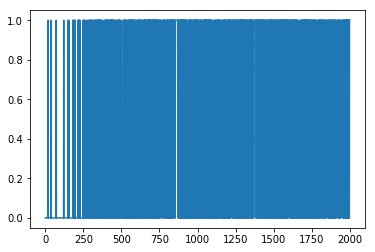

In [52]:
plt.plot(rList)

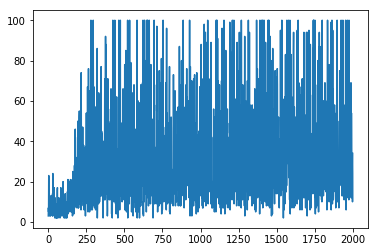

In [53]:
plt.plot(jList)